# Data Wrangling and EDA

## Import raw data

Raw data is in csv format and is located online here: https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions/

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the raw data into a pandas df. There are two sets of data - one containing the recipes
# the other containing the information regarding user interactions and reviews
recipes_df = pd.read_csv('../Data/Raw/RAW_recipes.csv')
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [3]:
interactions_df = pd.read_csv('../Data/Raw/RAW_interactions.csv')
interactions_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [4]:
# Now let's inspect the data, looking for null values and determining what the datatypes are in each
print(recipes_df.info())
print(interactions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user

>This data set is looking good so far.  There are very few null values, mostly associated with large text fields like description or review text. The other features seem mostly complete.  There is one recipe name that is null - maybe that will have to be fixed.

In [5]:
# Look at the recipe which does not have a name.
pd.set_option('display.max_colwidth', None)
recipes_df[recipes_df['name'].isna()][['tags','ingredients','steps']]

,tags,ingredients,steps
721,"['15-minutes-or-less', 'time-to-make', 'course', 'preparation', 'low-protein', 'salads', 'easy', 'salad-dressings', 'dietary', 'low-sodium', 'inexpensive', 'low-in-something', '3-steps-or-less']","['lemon', 'honey', 'horseradish mustard', 'garlic clove', 'dried parsley', 'dried basil', 'dried thyme', 'garlic salt', 'black pepper', 'olive oil']","['in a bowl , combine ingredients except for olive oil', 'slowly whisk inches', 'olive oil until thickened', 'great with field greens', 'makes about 2 / 3', 'cup dressing']"


In [6]:
# It looks as if this recipe is for a salad dressing.  I will rename it to indicate this
pd.reset_option('display.max_colwidth')
recipes_df.loc[721, 'name'] = 'lemon honey salad dressing'
recipes_df.loc[721]

name                                     lemon honey salad dressing
id                                                           368257
minutes                                                          10
contributor_id                                               779451
submitted                                                2009-04-27
tags              ['15-minutes-or-less', 'time-to-make', 'course...
nutrition             [1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]
n_steps                                                           6
steps             ['in a bowl , combine ingredients except for o...
description                                           -------------
ingredients       ['lemon', 'honey', 'horseradish mustard', 'gar...
n_ingredients                                                    10
Name: 721, dtype: object

In [7]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


## Exploratory Data Analysis

### EDA for recipes_df:

In [8]:
# Check if all the recipe ids are unique
recipes_df['id'].nunique()

231637

In [9]:
# Get summary statistics of the numerical columns
recipes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,231637.0,2.220147e+05,1.412066e+05,38.0,99944.0,207249.0,333816.0,5.377160e+05
minutes,231637.0,9.398546e+03,4.461963e+06,0.0,20.0,40.0,65.0,2.147484e+09
contributor_id,231637.0,5.534885e+06,9.979141e+07,27.0,56905.0,173614.0,398275.0,2.002290e+09
n_steps,231637.0,9.765499e+00,5.995128e+00,0.0,6.0,9.0,12.0,1.450000e+02
n_ingredients,231637.0,9.051153e+00,3.734796e+00,1.0,6.0,9.0,11.0,4.300000e+01


>From the above summary statistics, a few things stand out:
>1. Minutes: the maximum minutes is 2e+09, this seems to be an error and will have to be investigated and fixed
>2. n_steps: similarly for number of steps, the max is 145.  This could be an error as well and will have to be looked at
>3. n_steps: the min number of steps is 0.  This can't be right as a recipe should have a minimum of 1 step

In [10]:
# Let's take a look at the minutes feature.  Specifically the max.
pd.set_option('display.max_colwidth', None)
recipes_df[recipes_df['minutes'] >= 2000000]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144074,no bake granola balls,261647,2147483647,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course', 'preparation', 'occasion', 'granola-and-porridge', 'hand-formed-cookies', 'breakfast', 'desserts', 'lunch', 'snacks', '1-day-or-more', 'cookies-and-brownies', 'to-go', 'camping']","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oats and coconut on a cookie sheet', 'place in the oven and toast for about 12 minutes , stirring twice , until lightly browned', 'meanwhile , combine the peanut butter , honey and brown sugar in a saucepan over medium heat , stirring continuously , until ingredients are thoroughly blended and sugar has completely melted', 'add the toasted oats and coconut to the peanut butter mixture , followed by the nuts , raisins and cranberries', 'stir to combine', 'set aside to cool for about 10 minutes', 'working with dampened hands , shape into bite sized balls and refrigerate for an hour', 'i usually let mine sit out for about 15 minutes prior to serving as we like them a little gooey just like my mighty nuts']","healthy snacks that kids (and grown ups) will love! i originally got the recipe from whole foods, then changed it up a bit. this is dairy-free and vegetarian. note: i have many a time made these without toasting the oats and coconut and it works out just fine that way as well :)","['rolled oats', 'unsweetened dried shredded coconut', 'crunchy peanut butter', 'honey', 'brown sugar', 'mixed nuts', 'raisins', 'dried cranberries']",8


>In the description for this recipe, it says it should take 60 minutes or less.  I will change the minutes column to reflect 60 minutes.

In [11]:
# Changing the recipe for index 144074 to indicate that it should take 60 minutes
pd.reset_option('display.max_colwidth')
recipes_df.loc[144074,'minutes'] = 60
recipes_df.loc[144074]

name                                          no bake granola balls
id                                                           261647
minutes                                                          60
contributor_id                                               464080
submitted                                                2007-10-26
tags              ['60-minutes-or-less', 'time-to-make', 'course...
nutrition               [330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]
n_steps                                                           9
steps             ['preheat the oven to 350 degrees', 'spread oa...
description       healthy snacks that kids (and grown ups) will ...
ingredients       ['rolled oats', 'unsweetened dried shredded co...
n_ingredients                                                     8
Name: 144074, dtype: object

In [12]:
# Let's check the 'minutes' column again to see if the max value makes sense
recipes_df['minutes'].describe()

count    2.316370e+05
mean     1.276455e+02
std      2.946337e+03
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.500000e+01
max      1.051200e+06
Name: minutes, dtype: float64

In [13]:
# The max is still over a million minutes, this doesn't make sense.  I will investigate that recipe as well.
recipes_df[recipes_df['minutes'] > 800].count()

name              2415
id                2415
minutes           2415
contributor_id    2415
submitted         2415
tags              2415
nutrition         2415
n_steps           2415
steps             2415
description       2377
ingredients       2415
n_ingredients     2415
dtype: int64

In [19]:
pd.set_option('display.max_colwidth', None)
recipes_df[recipes_df['minutes'] > 100000].head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5497,angelica liqueur,70551,201610,59064,2003-09-04,"['weeknight', 'time-to-make', 'course', 'cuisine', 'preparation', 'occasion', 'beverages', '1-day-or-more', 'easy', 'european', 'no-cook', 'beginner-cook', 'dinner-party', 'romantic', 'vegan', 'vegetarian', 'cocktails', 'dietary', 'gifts', 'seasonal', 'novelty', 'taste-mood', 'number-of-servings', 'presentation', 'served-cold', 'technique']","[891.8, 0.0, 906.0, 0.0, 1.0, 0.0, 76.0]",7,"['crush the fennel , aniseed , coriander seeds and cloves a little and chop the angelica stems', 'put the seeds and angelica stems into a large preserving jar', 'add the sugar', 'pour on the vodka and leave by a sunny window for 2 weeks , swirling the mixture daily', 'strain through find muslin into a sterilised bottle and seal', 'leave in a dark place for at least 4 months', 'drink in small quantities with a piece of angelica in each glass']",finish off a large meal with a tiny glass of this. cook time is the maturation time.,"['fennel seed', 'anise seed', 'coriander seeds', 'cloves', 'angelica', 'caster sugar', 'vodka']",7
6545,apple cinnamon liqueur,236379,129615,327115,2007-06-21,"['time-to-make', 'course', 'preparation', 'low-protein', 'healthy', 'beverages', '1-day-or-more', 'low-fat', 'dietary', 'low-sodium', 'low-cholesterol', 'low-saturated-fat', 'low-in-something']","[4.2, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]",7,"['in a quart jar , add apple , cinnamon sticks , 1 cup sugar , and vodka', 'seal jar tightly , and place in a dry , dark place for about 2 weeks', 'after two weeks , strain the liquid using a double layer of cheese cloth', 'gently squeeze the apples , getting as much juice from them as possible', 'in a fresh quart jar , add the second cup of sugar , the glycerin , water to top and the strained liquid', 'seal and store again in a dark place until sugar is dissolved', 'once the sugar has all dissolved , bottle the resulting liqueur in a fresh bottle and let age for roughly 3 months']","this is amazing. a really nice amber color and a mellow, almost apple cider like taste.","['granny smith apple', 'cinnamon sticks', 'vodka', 'sugar', 'water', 'glycerin']",6
26124,blueberry liqueur,236281,129615,327115,2007-06-21,"['time-to-make', 'course', 'preparation', 'low-protein', 'healthy', '5-ingredients-or-less', 'beverages', '1-day-or-more', 'easy', 'low-fat', 'dietary', 'low-sodium', 'low-cholesterol', 'low-saturated-fat', 'low-in-something']","[4.2, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]",7,"['in a quart jar , blueberries , 1 cup sugar , and vodka', 'seal jar tightly , and place in a dry , dark place for about 2 weeks', 'after two weeks , strain the liquid using a double layer of cheese cloth', 'gently squeeze the blueberries , getting as much juice from them as possible', 'in a fresh quart jar , add the second cup of sugar , water to top and the strained liquid', 'seal and store again in a dark place until sugar is dissolved', 'once the sugar has all dissolved , bottle the resulting liqueur in a fresh bottle and let age for roughly 3 months']",this is an absolutely beautiful shade of purple and has a nice light blueberry taste. great in iced tea.,"['blueberries', 'vodka', 'sugar', 'water', 'glycerin']",5
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'beverages', 'fruit', '1-day-or-more', 'european', 'no-cook', 'vegetarian', 'english', 'irish', 'dietary', 'gifts', 'copycat', 'welsh', 'egg-free', 'free-of-something', 'citrus', 'lemon', 'novelty', 'taste-mood', 'sweet', 'technique']","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 pints', 'thermometer', '8 pint fermentation jar', 'airlock', 'bottles', 'bruise the ginger by folding it in to a clean cloth and hitting it with a hammer to release its flavour', 'tie the bruised ginger , c

>There are over 2000 recipes whose prep time takes over 800 minutes.  Looking at recipes that take over 100,000 minutes and reading through some of their descriptions above, it seems like the minutes are actually accurate.  A lot of these recipes require extended waiting times, especially for liquor recipes.  I will keep these in the data set.  It would be nice to parse out minutes between "active time" and "idle time" but don't think that it's worth it at this point in time.  I will keep note of this as we go through the analysis.

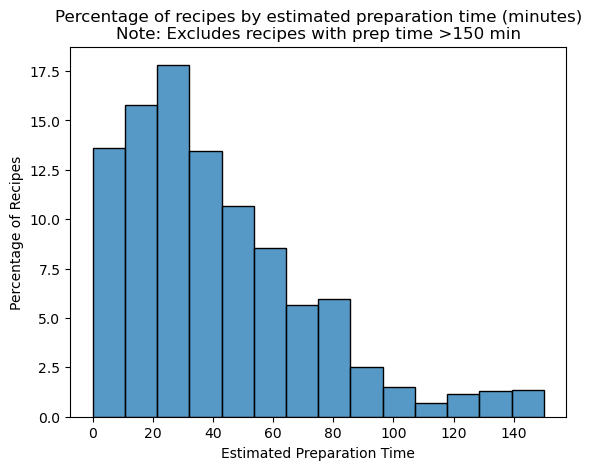

In [14]:
# Let's make a histogram of the number of minutes it takes for each recipe.
# Since this is a large dataset, I'll use numpy to bin the data and plot from a numpy array

minutes = recipes_df[recipes_df['minutes']<=150]['minutes'].values
bins = np.linspace(np.min(minutes), np.max(minutes), 15)
_ = sns.histplot(minutes, bins=bins, stat = 'percent')
plt.title('Percentage of recipes by estimated preparation time (minutes)\nNote: Excludes recipes with prep time >150 min')
plt.ylabel('Percentage of Recipes')
plt.xlabel('Estimated Preparation Time')
plt.show()

In [35]:
# Let's look at the n_steps column now and assess whether the max needs to be corrected
pd.set_option('display.max_colwidth', None)

# Find the index of the df with the recipe that has the most steps
max_steps_index = recipes_df[recipes_df['n_steps'] == max(recipes_df['n_steps'])].index[0]

# Since the steps are contained in a string, but the string is in a list format, we can use literal_eval to convert it to a list
# I'll look at the length of the list to make sure the number of steps is accurate
import ast
list = ast.literal_eval(recipes_df.loc[max_steps_index,'steps'])
len(list)

145

>The number of steps is accurate for this case and it seems to be a true outlier.  Looking at the steps column, the written steps make sense...this is truly a lengthy recipe.

In [37]:
# Let's look at the recipes for which n_steps == 0

recipes_df[recipes_df['n_steps'] == 0]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
3381,all season bread,176767,90,331268,2006-07-10,"['time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'for-large-groups', 'breads', 'fruit', 'vegetables', 'easy', 'fall', 'spring', 'winter', 'muffins', 'coffee-cakes', 'seasonal', 'comfort-food', 'inexpensive', 'quick-breads', 'tropical-fruit', 'bananas', 'carrots', 'taste-mood', 'number-of-servings', '3-steps-or-less', '4-hours-or-less']","[198.8, 11.0, 70.0, 18.0, 5.0, 5.0, 10.0]",0,[],"just change the fruit/vegetable in this recipe and make the (tender, moist, heavy dark) bread your heart desires! try zucchini in the summer, pumpkin in the fall, carrot-raisin in the winter, & banana-walnut in the spring. \r\n\r\nuse your imagination.","['flour', 'baking soda', 'salt', 'baking powder', 'cinnamon', 'eggs', 'white sugar', 'vegetable oil', 'real vanilla', 'raw carrots', 'raisins', 'walnuts']",12


>There is only one recipe or which there is 0 steps.  It is a bread recipe.  Lets look to see if we can find a similar bread recipe within the dataframe and that may inform how many steps this recipe should have.

In [48]:
# Let's find other bread recipes in the df
print(f"Number of bread recipes: {recipes_df[recipes_df['name'].str.contains('bread')]['name'].count()}")
bread_recipes = recipes_df[recipes_df['name'].str.contains('bread')]

# It looks like there are over 8500 bread recipes.  Let's look at the average number of steps for these recipes
print(f"Average number of steps for bread recipes: {bread_recipes['n_steps'].mean():.0f}")

# On average there are 11 steps for a bread recipe.  Let's impute the missing value with the average.
pd.reset_option('display.max_colwidth')
recipes_df.loc[3381,'n_steps'] = 11
recipes_df.loc[3381]

Number of bread recipes: 8552
Average number of steps for bread recipes: 11


name                                               all season bread
id                                                           176767
minutes                                                          90
contributor_id                                               331268
submitted                                                2006-07-10
tags              ['time-to-make', 'course', 'main-ingredient', ...
nutrition                 [198.8, 11.0, 70.0, 18.0, 5.0, 5.0, 10.0]
n_steps                                                          11
steps                                                            []
description       just change the fruit/vegetable in this recipe...
ingredients       ['flour', 'baking soda', 'salt', 'baking powde...
n_ingredients                                                    12
Name: 3381, dtype: object

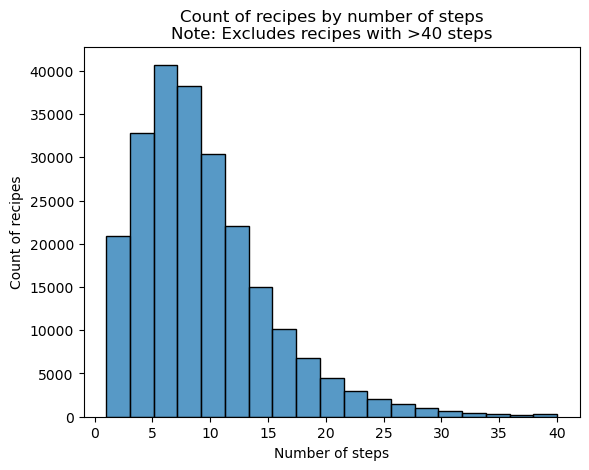

In [61]:
# Now that the max is verified and the missing values fixed, let's look at a histogram of the n_steps feature

n_steps = recipes_df[recipes_df['n_steps'] <= 40]['n_steps'].values
bins = np.linspace(np.min(n_steps), np.max(n_steps), 20)
_ = sns.histplot(n_steps, bins = bins)
plt.title('Count of recipes by number of steps\nNote: Excludes recipes with >40 steps')
plt.xlabel('Number of steps')
plt.ylabel('Count of recipes')
plt.show()

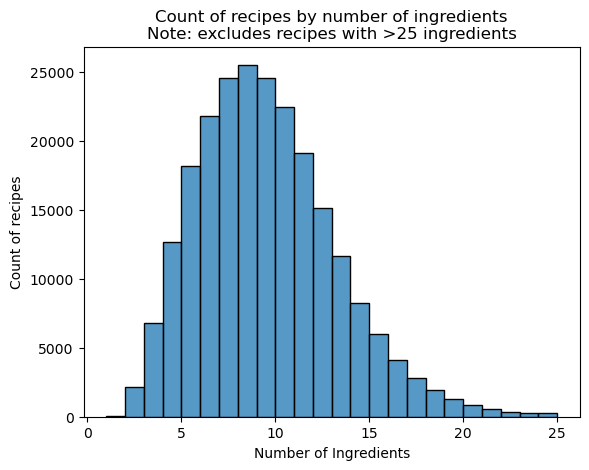

In [66]:
# Lastly, let's look at a histogram of the number of ingredients

n_ingredients = recipes_df[recipes_df['n_ingredients']<=25]['n_ingredients'].values
bins = np.linspace(np.min(n_ingredients), np.max(n_ingredients), 25)
_ = sns.histplot(n_ingredients, bins = bins)
plt.title('Count of recipes by number of ingredients\nNote: excludes recipes with >25 ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Count of recipes')
plt.show()

### EDA for interactions_df

In [74]:
# Let's look at the summary stats for the numeric columns:
interactions_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1132367.0,1.384291e+08,5.014269e+08,1533.0,135470.0,330937.0,804550.0,2.002373e+09
recipe_id,1132367.0,1.608972e+05,1.303987e+05,38.0,54257.0,120547.0,243852.0,5.377160e+05
rating,1132367.0,4.411016e+00,1.264752e+00,0.0,4.0,5.0,5.0,5.000000e+00


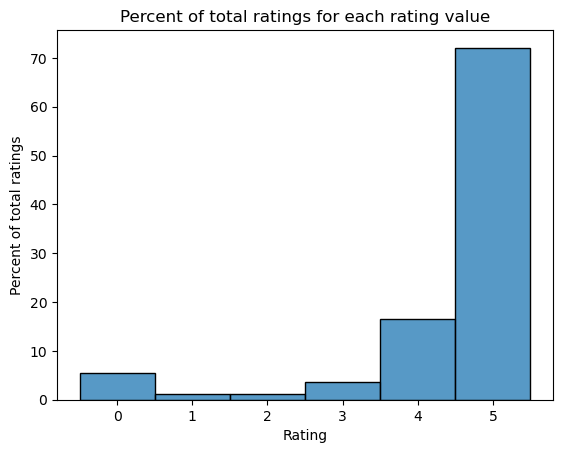

In [71]:
# Let's look at the distribution of ratings:
_ = sns.histplot(interactions_df['rating'], bins = 5, stat = 'percent', discrete = True)
plt.title('Percent of total ratings for each rating value')
plt.xlabel('Rating')
plt.ylabel('Percent of total ratings')
plt.show()

>Interesting - over 70% of the ratings are a 5.

Let's create a new feature to show how many reviews each recipe has.

In [75]:
interactions_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [78]:
recipes_df.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


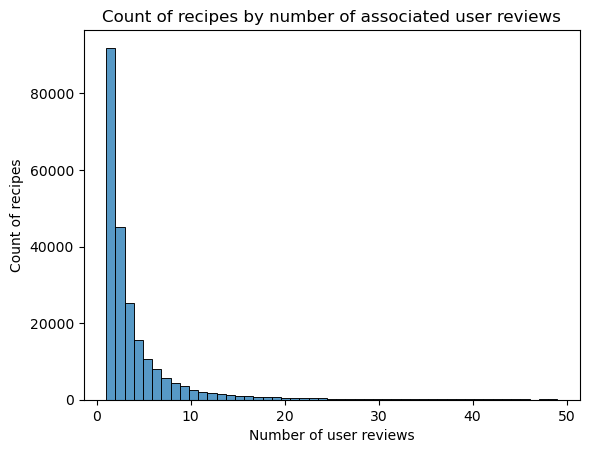

In [94]:
# We'll add a new column to the recipes_df showing number of reviews for each recipe
recipes_df_with_n_reviews = recipes_df.merge(interactions_df['recipe_id'].value_counts(), how = 'left', left_on= 'id', right_on='recipe_id')
recipes_df_with_n_reviews.rename(columns={'count':'n_reviews'}, inplace=True)

# Let's look at the distribution of n_reviews
n_reviews = recipes_df_with_n_reviews[recipes_df_with_n_reviews['n_reviews']<50]['n_reviews'].values
bins = np.linspace(np.min(n_reviews), np.max(n_reviews), 50)
_ = sns.histplot(n_reviews, bins = bins)
plt.title('Count of recipes by number of associated user reviews')
plt.xlabel('Number of user reviews')
plt.ylabel('Count of recipes')
plt.show()

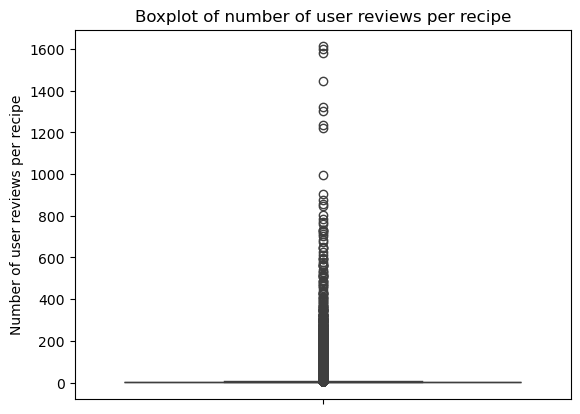

In [97]:
# Let's create a boxplot to visualize how many outliers there are
n_reviews = recipes_df_with_n_reviews['n_reviews'].values
_ = sns.boxplot(n_reviews)
plt.title('Boxplot of number of user reviews per recipe')
plt.ylabel('Number of user reviews per recipe')
plt.show()

>The vast majority of the recipes only contain less than 5 reviews.  There are a significant number of outliers. The max number of reviews for a recipe is over 1600.

In [145]:
# Let's also calculate the average rating for each recipe
recipe_df_with_rating_info = recipes_df_with_n_reviews

# Use the interactions_df to calculate the average rating grouped by recipe_id
avg_rating = interactions_df.groupby('recipe_id')['rating'].mean()

# Merge the avg_rating into the recipe_df
recipe_df_with_rating_info = recipe_df_with_rating_info.merge(avg_rating, how = 'left', left_on='id', right_on='recipe_id')
recipe_df_with_rating_info.rename(columns = {'rating':'avg_rating'}, inplace=True)
recipe_df_with_rating_info.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,n_reviews,avg_rating
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,3,5.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,4,3.5
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,1,4.0


In [146]:
recipe_df_with_rating_info.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'n_reviews', 'avg_rating'],
      dtype='object')

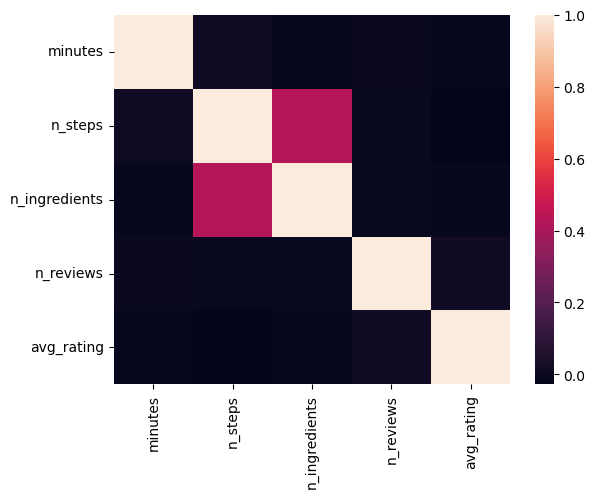

In [150]:
# Let's create a correlation heatmap of the numerical features in the recipe_df:
non_numeric_columns = ['name', 'id', 'submitted','contributor_id', 'tags',
       'nutrition', 'steps', 'description', 'ingredients']
recipe_df_with_rating_info_numeric = recipe_df_with_rating_info.drop(columns=non_numeric_columns)

# Create the correlation matrix out of the numeric columns
corr = recipe_df_with_rating_info_numeric.corr()

# Use the correlation matrix to create the heatmap
_ = sns.heatmap(corr)

>Well, this isn't too useful.  The number of ingredients is correlated with the number of steps.  But the number of reviews or average rating don't seem to be correlated to anything.

The max number of user reviews is: 7671 reviews


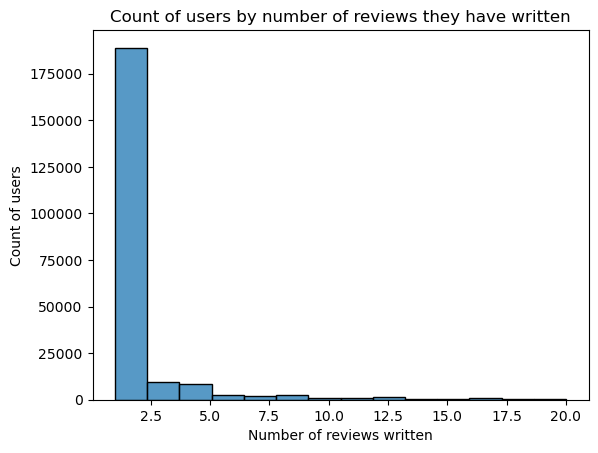

In [122]:
# Let's show the quantity of reviews generated by each user
user_reviews = interactions_df.groupby('user_id').size()

# Let's see what the max number of user reviews is:
max = np.max(user_reviews)
print(f'The max number of user reviews is: {max} reviews') # wow...over 7k reviews!

# Let's plot this but exclude users who have generated over 15 reviews
bins = np.linspace(np.min(user_reviews), 20, 15)
_ = sns.histplot(user_reviews, bins = bins)
plt.title('Count of users by number of reviews they have written')
plt.xlabel('Number of reviews written')
plt.ylabel('Count of users')
plt.show()

>There are quite a few super users that have generated an enormous number of reviews.  But the vast majority have only written one or two reviews

### Sparcity Calculation

Sparcity = 1 - (number of interactions / total possible interactions)

In [138]:
# Calculate the number of users:
n_users = interactions_df['user_id'].nunique()

# Calculate the number of recipes:
n_recipes = len(recipes_df)

# Calculate the total possible interactions:
total_possible_interactions = n_users * n_recipes

# Calculate the number of actual interactions:
actual_interactions = len(interactions_df)

# Calculate sparcity:
sparcity = (1 - (actual_interactions / total_possible_interactions))*100

print(f'The sparcity for this dataset is: {sparcity:.4f}%')

The sparcity for this dataset is: 99.9978%
